In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset1=pd.read_csv('/Users/gulcinecesasmaz/Desktop/Master_Studies/MDBLUE_DATA/Dataset1_MD_1Y_all.csv')
print(dataset1)
print(dataset1.columns)
print(dataset1.shape)

     Conductivity  timestamps  Water_Level  Dissolved_Oxygen   Ph  \
0           304.0  2024-06-13        43.53               2.3  7.4   
1           309.0  2024-06-15        43.08               2.2  7.6   
2           308.0  2024-06-16        42.87               2.2  7.6   
3           308.0  2024-06-17        42.68               2.2  7.6   
4           308.0  2024-06-18        42.54               2.2  7.6   
..            ...         ...          ...               ...  ...   
352         298.0  2025-06-08        40.77               2.1  7.8   
353         299.0  2025-06-09        40.78               2.1  7.8   
354         298.0  2025-06-10        40.81               2.1  7.8   
355         298.0  2025-06-11        40.81               2.1  7.8   
356         298.0  2025-06-12        40.84               2.1  7.8   

     Temperature        dk  
0           21.3       0.0  
1           21.3    2880.0  
2           21.3    4320.0  
3           21.3    5760.0  
4           21.3    7200.0

## Conductivity Analysis 

In [4]:
conductivity = dataset1.iloc[:, [0, 1]]
print(conductivity)

     Conductivity  timestamps
0           304.0  2024-06-13
1           309.0  2024-06-15
2           308.0  2024-06-16
3           308.0  2024-06-17
4           308.0  2024-06-18
..            ...         ...
352         298.0  2025-06-08
353         299.0  2025-06-09
354         298.0  2025-06-10
355         298.0  2025-06-11
356         298.0  2025-06-12

[357 rows x 2 columns]


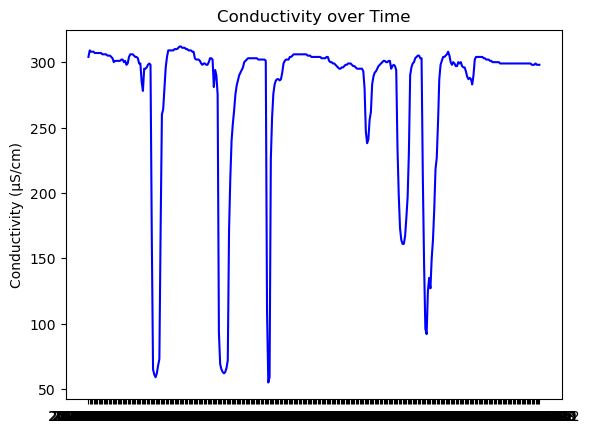

In [6]:
plt.plot(conductivity['timestamps'], conductivity['Conductivity'], color='blue', label='Conductivity')
#plt.xlabel('Date')
plt.ylabel('Conductivity (µS/cm)')
plt.title('Conductivity over Time')
#plt.xticks(rotation=95)
plt.show()

In [7]:
print(conductivity.describe())
print(conductivity.info())
conductivity.isnull().sum()

       Conductivity
count    357.000000
mean     277.831933
std       59.203276
min       55.000000
25%      293.000000
50%      299.000000
75%      304.000000
max      312.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Conductivity  357 non-null    float64
 1   timestamps    357 non-null    object 
dtypes: float64(1), object(1)
memory usage: 5.7+ KB
None


Conductivity    0
timestamps      0
dtype: int64

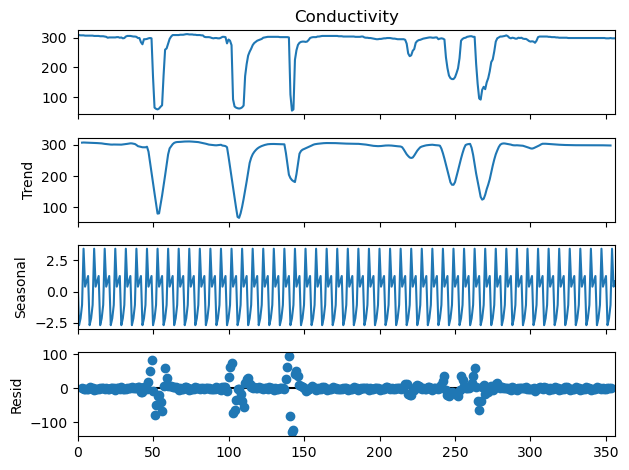

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(conductivity['Conductivity'], model='additive', period=7)
result.plot()
plt.show()


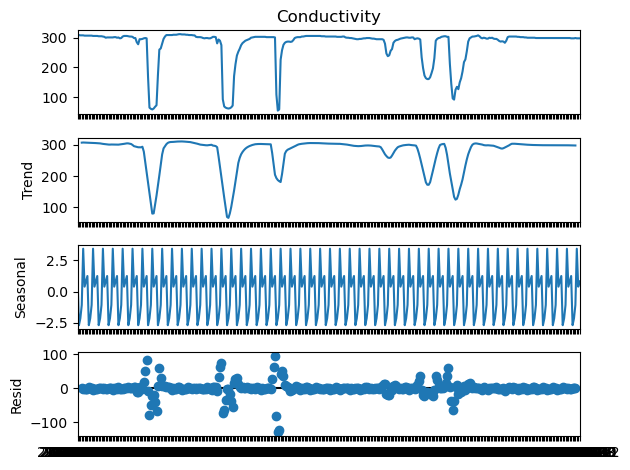

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

time=conductivity.set_index('timestamps')['Conductivity']
result = seasonal_decompose(time, model='additive', period=7)
result.plot()
plt.show()


## ADF

## ADF Test (Augmented Dickey-Fuller)
Null Hypothesis (H₀): The series has a unit root → non-stationary

p-value < 0.05 → Reject H₀ → ✅ Stationary

p-value ≥ 0.05 → Fail to reject H₀ → ❌ Non-stationary

✔ So for ADF:

⛳ Small p-value (< 0.05) = Stationary (Good)

🚩 Large p-value (≥ 0.05) = Non-stationary

In [7]:
from statsmodels.tsa.stattools import adfuller
##for temperature, we will investigate the p-value and ADF statistic to be sure it is stationary, otherwise we will need to make it stationary by using differencing.
adf_testing=adfuller(conductivity['Conductivity'].values)
print('ADF Statistic:', adf_testing[0])
print('p-value:', adf_testing[1])

ADF Statistic: -6.062860553455126
p-value: 1.2009606482045643e-07


## KPSS
According to KPSS(Kwiatkowski–Phillips–Schmidt–Shin)test, null hypothesis can not be rejected if p values bigger than 0.05. therefore, it is a non-stationary time series. Null hypothesis for this test says it is stationary. Alternative hypothesis says it is non-stationary.

Null Hypothesis (H₀): The series is stationary

p-value < 0.05 → Reject H₀ → ❌ Non-stationary

p-value ≥ 0.05 → Fail to reject H₀ → ✅ Stationary

✔ So for KPSS:

🚩 Small p-value (< 0.05) = Non-stationary

⛳ Large p-value (≥ 0.05) = Stationary

In [8]:
from statsmodels.tsa.stattools import kpss
testing_kpss = kpss(conductivity['Conductivity'].values)
print('KPSS Statistic:', testing_kpss[0])
print('p-value:', testing_kpss[1])

KPSS Statistic: 0.07689062951624645
p-value: 0.1


/var/folders/df/732p83n92875l2sf7gcrgzq00000gn/T/ipykernel_4855/337651859.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  testing_kpss = kpss(conductivity['Conductivity'].values)


Conductivity data is stationary. The series is stationary


## For ADF & KPSS
Case 1: Both tests conclude that the series is not stationary - The series is not stationary

Case 2: Both tests conclude that the series is stationary - The series is stationary

Case 3: KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.

Case 4: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.
https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html

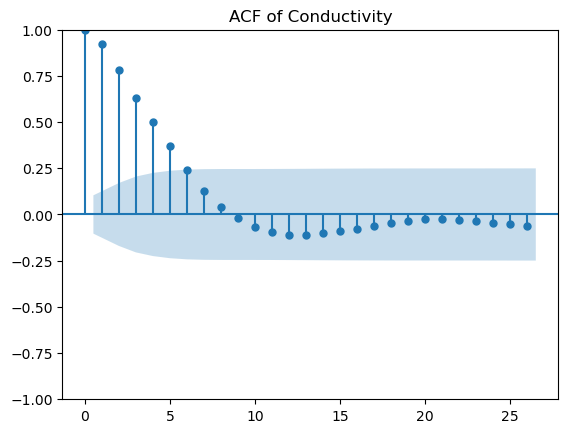

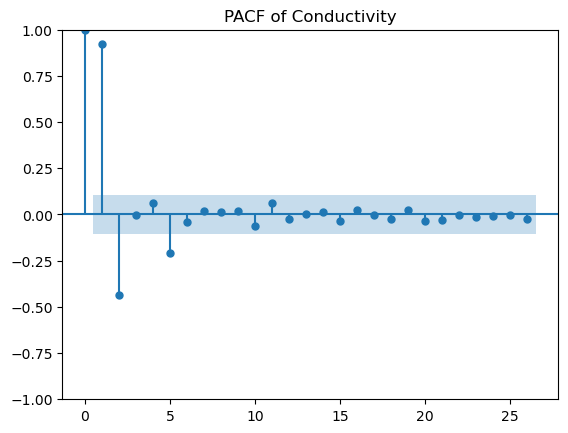

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(conductivity['Conductivity'])
plt.title('ACF of Conductivity')
plt.show()  
plot_pacf(conductivity['Conductivity'])
plt.title('PACF of Conductivity')
plt.show()

In [ ]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

In [14]:
sarimax_model=auto_arima(conductivity['Conductivity'],seasonal=True,m=7)
print(sarimax_model.summary())

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  357
Model:             SARIMAX(1, 0, 2)x(1, 0, [], 7)   Log Likelihood               -1584.100
Date:                            Thu, 26 Jun 2025   AIC                           3180.201
Time:                                    15:47:50   BIC                           3203.467
Sample:                                         0   HQIC                          3189.455
                                            - 357                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     57.1004      8.623      6.622      0.000      40.199      74.002
ar.L1          0.8093      0.042   

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [15]:
test_days=71
train = conductivity[:-test_days]
test=conductivity[-test_days:]
print(train)


     Conductivity  timestamps
0           304.0  2024-06-13
1           309.0  2024-06-15
2           308.0  2024-06-16
3           308.0  2024-06-17
4           308.0  2024-06-18
..            ...         ...
281         304.0  2025-03-28
282         305.0  2025-03-29
283         306.0  2025-03-30
284         308.0  2025-03-31
285         305.0  2025-04-01

[286 rows x 2 columns]


In [16]:
print(test)

     Conductivity  timestamps
286         300.0  2025-04-02
287         298.0  2025-04-03
288         300.0  2025-04-04
289         299.0  2025-04-05
290         297.0  2025-04-06
..            ...         ...
352         298.0  2025-06-08
353         299.0  2025-06-09
354         298.0  2025-06-10
355         298.0  2025-06-11
356         298.0  2025-06-12

[71 rows x 2 columns]


## SARIMAX fitting for 10 days

In [17]:
model = SARIMAX(train['Conductivity'], order=(1, 0, 2), seasonal_order=(1, 0, [], 7), m=7)
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.17257D+00    |proj g|=  1.49905D-01

At iterate    5    f=  4.70066D+00    |proj g|=  2.44469D-01

At iterate   10    f=  4.61078D+00    |proj g|=  2.13664D-02

At iterate   15    f=  4.60555D+00    |proj g|=  4.66577D-02

At iterate   20    f=  4.59739D+00    |proj g|=  2.93061D-04

At iterate   25    f=  4.59738D+00    |proj g|=  2.48040D-03

At iterate   30    f=  4.59731D+00    |proj g|=  6.53999D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['m']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
 This problem is unconstrained.


## 9-10 gun yili da tamamlamak icin, ama 30 gun cizildi

In [25]:
# Use the last timestamp value, not the integer index
last_obs_date = pd.to_datetime(test['timestamps'].iloc[-1])
# Create 10 future days starting from the last timestamp in test
future_dates = pd.date_range(start=last_obs_date + pd.Timedelta(days=1), periods=30, freq='D')
#print(future_dates)
#print(last_obs_date)
# Forecast 10 steps from the last observed date
forecast = results.forecast(steps=30)
#print(forecast)
# Construct forecast series
forecast_series = pd.Series(forecast, index=future_dates)


In [26]:
# Print or plot
print(forecast_series.values)
print(forecast_series.index)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
DatetimeIndex(['2025-06-13', '2025-06-14', '2025-06-15', '2025-06-16',
               '2025-06-17', '2025-06-18', '2025-06-19', '2025-06-20',
               '2025-06-21', '2025-06-22', '2025-06-23', '2025-06-24',
               '2025-06-25', '2025-06-26', '2025-06-27', '2025-06-28',
               '2025-06-29', '2025-06-30', '2025-07-01', '2025-07-02',
               '2025-07-03', '2025-07-04', '2025-07-05', '2025-07-06',
               '2025-07-07', '2025-07-08', '2025-07-09', '2025-07-10',
               '2025-07-11', '2025-07-12'],
              dtype='datetime64[ns]', freq='D')


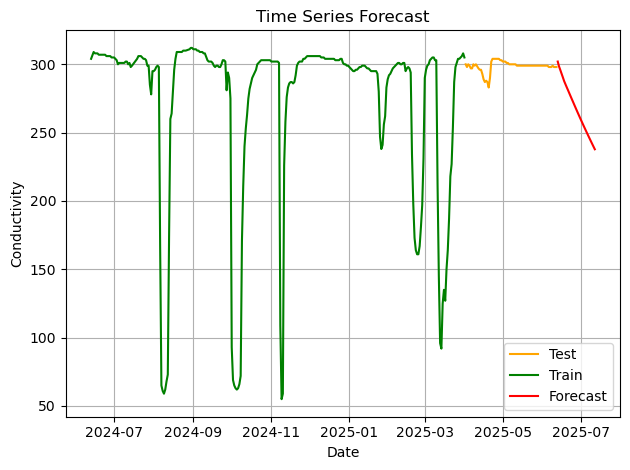

In [33]:
# Ensure timestamps are datetime
test_dates = pd.to_datetime(test['timestamps'])
train_dates = pd.to_datetime(train['timestamps'])

plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Conductivity')
plt.plot(test_dates, test['Conductivity'], label='Test', color='orange')
plt.plot(train_dates, train['Conductivity'], label='Train', color='green')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ARIMA

In [11]:
test_days=71
train = conductivity[:-test_days]
test=conductivity[-test_days:]
print(train)

     Conductivity  timestamps
0           304.0  2024-06-13
1           309.0  2024-06-15
2           308.0  2024-06-16
3           308.0  2024-06-17
4           308.0  2024-06-18
..            ...         ...
281         304.0  2025-03-28
282         305.0  2025-03-29
283         306.0  2025-03-30
284         308.0  2025-03-31
285         305.0  2025-04-01

[286 rows x 2 columns]


In [12]:
model_arima = auto_arima(train['Conductivity'], order=(1, 0, 2), m=7)
results_arima = model_arima  # model_arima is already fitted

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/

In [15]:
#Use the last timestamp value, not the integer index
last_obs_date = pd.to_datetime(test['timestamps'].iloc[-1])
# Create 10 future days starting from the last timestamp in test
future_dates = pd.date_range(start=last_obs_date + pd.Timedelta(days=1), periods=30, freq='D')
#print(future_dates)
#print(last_obs_date)
# Forecast 30 steps from the last observed date using predict
forecast = results_arima.predict(n_periods=30)
#print(forecast)
# Construct forecast series
forecast_series = pd.Series(forecast, index=future_dates)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


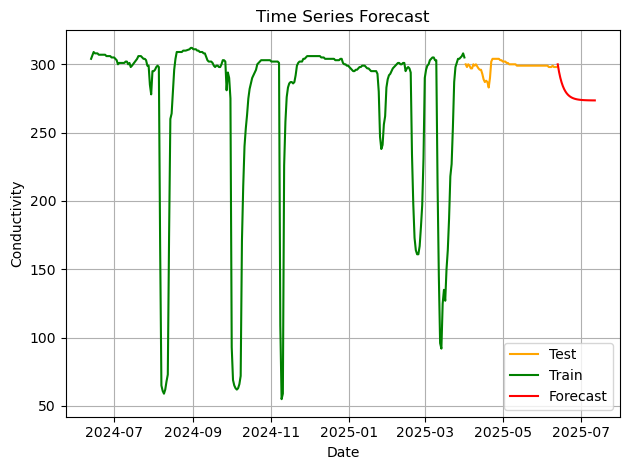

In [16]:
# Ensure timestamps are datetime
test_dates = pd.to_datetime(test['timestamps'])
train_dates = pd.to_datetime(train['timestamps'])

plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Conductivity')
plt.plot(test_dates, test['Conductivity'], label='Test', color='orange')
plt.plot(train_dates, train['Conductivity'], label='Train', color='green')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## AR

In [ ]:
test_days=71
train = conductivity[:-test_days]
test=conductivity[-test_days:]
print(train)

In [18]:
from statsmodels.tsa.ar_model import AutoReg

model_arma = AutoReg(train['Conductivity'], lags=1)
results_arma = model_arma.fit()

In [21]:
# Use the last timestamp value, not the integer index
last_obs_date = pd.to_datetime(test['timestamps'].iloc[-1])
# Create 30 future days starting from the last timestamp in test
future_dates = pd.date_range(start=last_obs_date + pd.Timedelta(days=1), periods=30, freq='D')
# Forecast 30 steps ahead using start and end
start = len(train)
end = start + 29
forecast = results_arma.predict(start=start, end=end)
# Construct forecast series
forecast_series = pd.Series(forecast.values, index=future_dates)

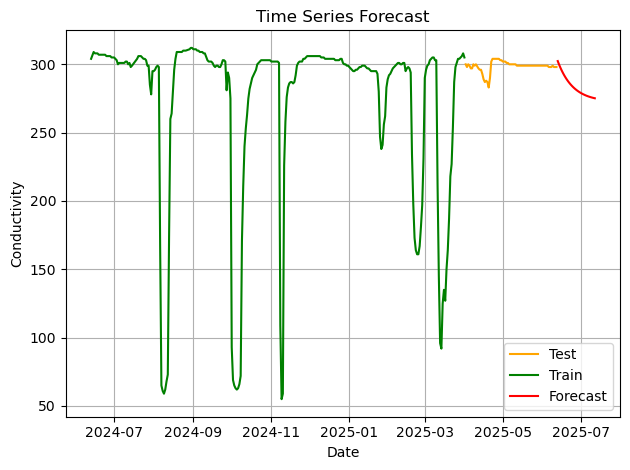

In [22]:
test_dates = pd.to_datetime(test['timestamps'])
train_dates = pd.to_datetime(train['timestamps'])

plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Conductivity')
plt.plot(test_dates, test['Conductivity'], label='Test', color='orange')
plt.plot(train_dates, train['Conductivity'], label='Train', color='green')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ARMA

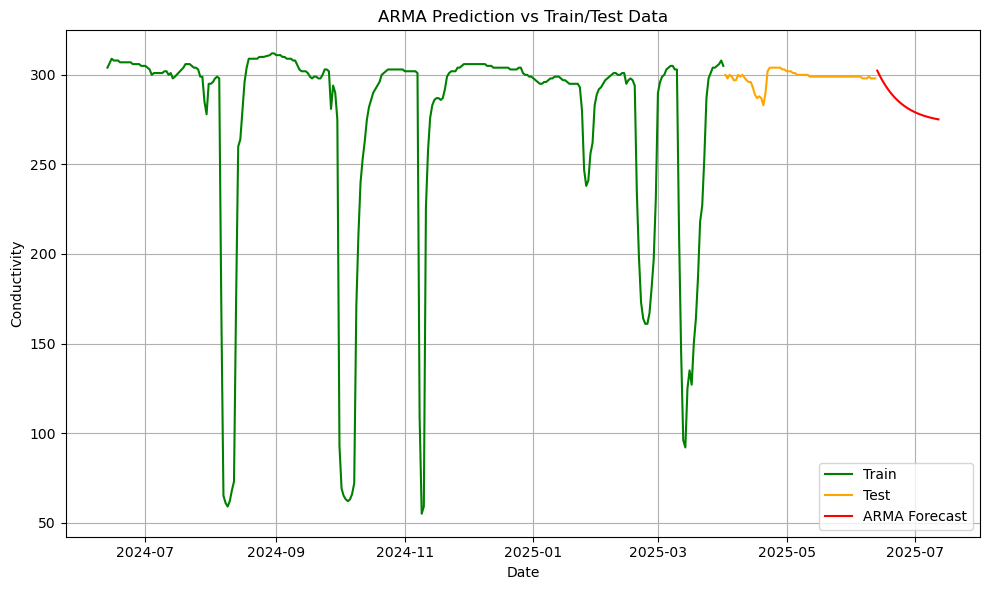

[1.         0.91607832 0.76642348 0.60838422 0.48293321 0.38335066
 0.30430238 0.24155414 0.19174481 0.15220635 0.12082085 0.09590716
 0.07613076 0.06043233 0.04797096 0.03807918 0.03022712 0.02399418
 0.01904649 0.01511904 0.01200144 0.0095267  0.00756226 0.00600289
 0.00476508 0.0037825  0.00300254 0.0023834  0.00189194 0.00150181]


In [28]:
import numpy as np
from statsmodels.tsa.arima_process import arma_acf

# AR and MA params must start with 1 (for lag 0)
ar = np.r_[1, -results_arima.arparams()]
ma = np.r_[1, results_arima.maparams()]

# Plot ARMA prediction with train and test dataset
test_dates = pd.to_datetime(test['timestamps'])
train_dates = pd.to_datetime(train['timestamps'])

plt.figure(figsize=(10, 6))
plt.title('ARMA Prediction vs Train/Test Data')
plt.xlabel('Date')
plt.ylabel('Conductivity')
plt.plot(train_dates, train['Conductivity'], label='Train', color='green')
plt.plot(test_dates, test['Conductivity'], label='Test', color='orange')
plt.plot(future_dates, forecast, label='ARMA Forecast', color='red')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

acf_values = arma_acf(ar=ar, ma=ma, lags=30)
print(acf_values)

## MA

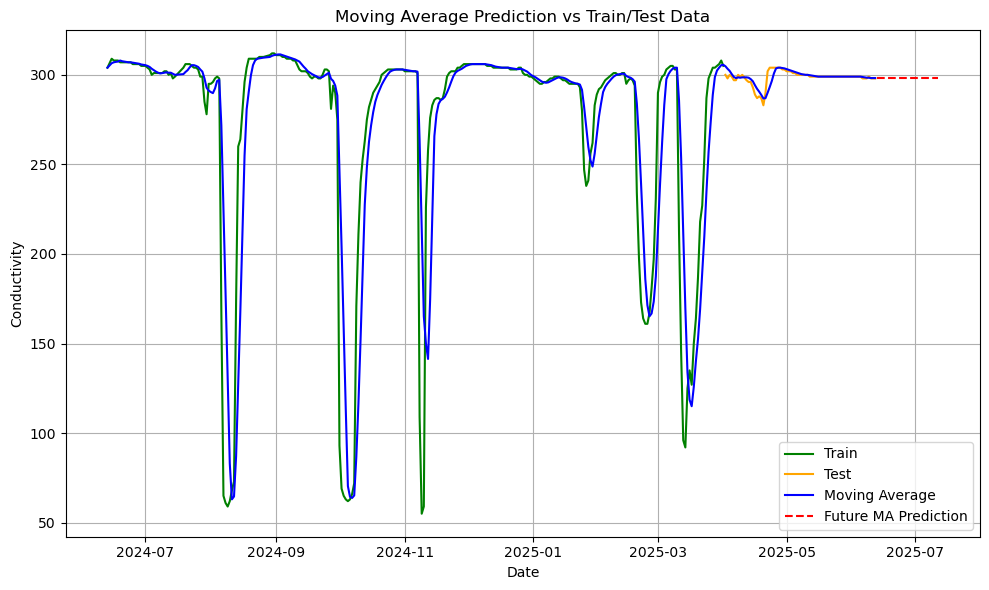

In [ ]:
# Apply moving average (rolling mean) on train data
window_size = 5 # 7-day moving average
moving_avg = train['Conductivity'].rolling(window=window_size, min_periods=1).mean()

# For prediction, extend moving average to test and future dates
# Concatenate train and test for rolling prediction
full_data = pd.concat([train, test])
full_moving_avg = full_data['Conductivity'].rolling(window=window_size, min_periods=1).mean()

# For future prediction, use the last moving average value as a naive forecast
future_pred = pd.Series([full_moving_avg.iloc[-1]] * len(future_dates), index=future_dates)

# Prepare dates for plotting
full_dates = pd.to_datetime(full_data['timestamps'])

plt.figure(figsize=(10, 6))
plt.title('Moving Average Prediction vs Train/Test Data')
plt.xlabel('Date')
plt.ylabel('Conductivity')
plt.plot(train_dates, train['Conductivity'], label='Train', color='green')
plt.plot(test_dates, test['Conductivity'], label='Test', color='orange')
#plt.plot(full_dates, full_moving_avg, label='Moving Average', color='blue')
plt.plot(future_dates, future_pred, label='Future MA Prediction', color='red', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()